<a href="https://colab.research.google.com/github/ghassenov/ML_use_cases/blob/main/iris_dataset_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np

In [45]:
from os import error
class Perceptron(object):
  """Perceptron classifier.
  Parameters
  -----------------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Passes over the training dataset
  random_state : int
    Random number generator seed for random weight initialization.

  Attributes
  ----------------
  w_ : 1D-array
    Weights after fitting
  errors_ : list
    Number of misclassifications (updates) in each epoch
  """
  def __init__(self,eta = 0.01,n_iter = 50,random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self,X,y):
    """Fit training data
    Parameters
    ------------
    X : {array-like},shape = [n_examples,n_features]
      Training vectors, where n_examples is the number of examples and n_features is the number of features
    y : {array-like}, shape = [n_examples]
      Target values

    Returns
    -----------
    self : object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01,size= 1 + X.shape[1])
    self.errors_ = []
    for _ in range (self.n_iter):
      errors = 0
      for xi,target in zip(X,y):
        update = self.eta*(target-self.predict(xi))
        self.w_[1:] += update*xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self,X):
    #calculationg net input
    return np.dot(X,self.w_[1:])+self.w_[0]
  def predict(self,X):
    return np.where(self.net_input(X)>= 0.0,1,-1)




To test perceptron implementation, we will restrict our analysis of the iris dataset to two feature variables (sepal length and petal length) which will allow us to visualize the decision regions of the trained model in a scatter plot for learning purposes.
* Note : the perceptron binary classifier can be extended to multiclass classifier by using for example (OvA) technique (which allows us to train one classifier per class where the particular class is the positive one, and the others are negative)

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/iris_data.csv')

In [47]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Now we will extract the first 100 class labels that correspond to the 50 Iris-setosa and 50 Iris-versicolor flowers and convert the class labels into two integer class labels:
* 1-> versicolor
* -1->setosa

In [48]:
# select setosa and versicolor
y = df.iloc[0:100,5].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [49]:
y = np.where(y == 'Iris-setosa',-1,1 )
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [50]:
# extract sepal length and petal length
X = df.iloc[0:100,[1,3]].values

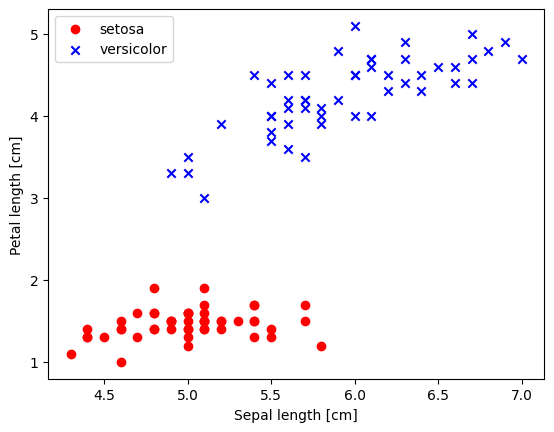

In [51]:
# plot data
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:,0],X[50:,1],color='blue',marker='x',label='versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

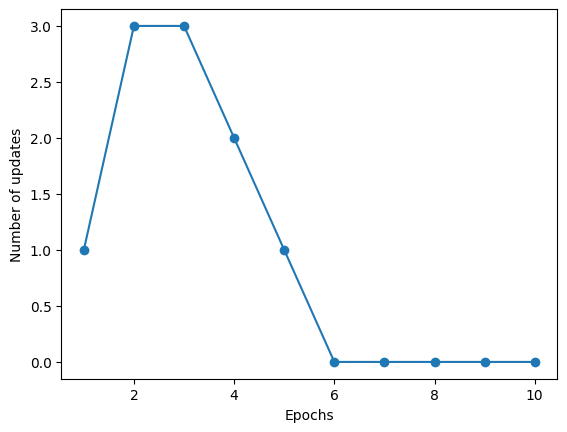

In [52]:
# now it's time to train the perceptron on the iris dataset
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


Our perceptron converged after the sixth epoch and should now be able to classify the training examples perfectly. let's implement a small convenience function to visualize the decision boudaries for 2D datasets

In [53]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution = 0.02):
  #setup marker generator and color map
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  #plot the decision surface
  x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
  x2_min, x2_max = X[:,1].min()-1,X[:,1].max()+1

  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
  z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  z = z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  #plot examples
  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl,0],
                y = X[y == cl,1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')


<ipython-input-53-1091795862>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl,0],


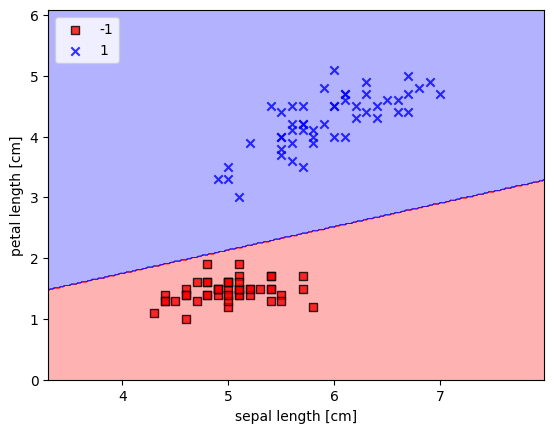

In [54]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Recap:

The perceptron is a fundamental algorithm in machine learning that serves as a building block for neural networks.  

**Formal Definition:**  
An artificial neuron takes an input vector:  
$\mathbf{x} = [x_1, x_2, ..., x_m]$  

and computes the net input:  
$z = \mathbf{w}^T\mathbf{x} = w_1x_1 + w_2x_2 + ... + w_mx_m$  

where:  
$\mathbf{w} = [w_1, w_2, ..., w_m]$ is the weight vector  

The neuron's output uses a step function:  
$\phi(z) = \begin{cases}
1 & \text{if } z \geq \theta \text{ (threshold)} \\
-1 & \text{otherwise}
\end{cases}$  

**Simplification with Bias Term:**  
We introduce:  
- $w_0 = -\theta$ (bias term)  
- $x_0 = 1$  

Now the equation becomes:  
$z = w_0 + \sum_{j=1}^m w_jx_j$  

with simpler decision rule:  
$\phi(z) = \text{sign}(z)$  

**Learning Algorithm:**  
1. Initialize weights to small random values  
2. For each training example $(\mathbf{x}^{(i)}, y^{(i)})$ where $y^{(i)} \in \{-1, 1\}$:  

   a. Compute prediction:  
   $\hat{y}^{(i)} = \phi(\mathbf{w}^T\mathbf{x}^{(i)})$  

   b. Update weights:  
   $\Delta w_j = \eta(y^{(i)} - \hat{y}^{(i)})x_j^{(i)}$  

   for each feature $j$, where:  
   - $\eta$ = learning rate (0 < $\eta$ ≤ 1)  
   - $y^{(i)}$ = true label  
   - $\hat{y}^{(i)}$ = predicted label  

   c. Apply updates simultaneously:  
   $w_j \leftarrow w_j + \Delta w_j$  

**Example (2D Case):**  
- Bias update: $\Delta w_0 = \eta(y^{(i)} - \hat{y}^{(i)})$  
- Feature updates:  
  $\Delta w_1 = \eta(y^{(i)} - \hat{y}^{(i)})x_1^{(i)}$  
  $\Delta w_2 = \eta(y^{(i)} - \hat{y}^{(i)})x_2^{(i)}$  

**Key Properties:**  
1. Binary classifier (requires linearly separable data)  
2. Online learning (updates after each example)  
3. Guaranteed convergence for separable data  
4. Creates linear decision boundary: $\mathbf{w}^T\mathbf{x} = 0$  

The perceptron demonstrates how simple computational units can learn, forming the basis for more complex neural networks.